#**РАБОЧАЯ ТЕТРАДЬ №6**

**Теоретический материал – Эволюционные методы**

Деревья решений являются одним из наиболее эффективных
Эволюционные методы
Эволюционные методы относятся к числу эффективных средств
решения задач оптимизации и структурного синтеза проектных решений.
Они основаны на использовании принципов оптимального приспособления
организмов в живой природе к условиям окружающей среды. К числу
эволюционных относятся методы генетические, колонии муравьев,
поведения толпы. Наиболее развиты и востребованы в настоящее время
генетические алгоритмы. По мере развития техники и технологий растет
доля сложных задач проектирования и управления, для решения которых
применение традиционных методов проблематично. Поэтому все большее
внимание уделяется применению методов искусственного интеллекта.
Генетические алгоритмы Для применения ГА необходимо:

1. выделить совокупность свойств объекта, характеризуемых
внутренними параметрами и влияющих на его полезность, т.е. выделить
множество управляемых параметровX=(x_1,x_2,…,x_n) среди x_i могут
быть величины различных типов (real, integer, Boolean, enumeration).
Наличие нечисловых величин (enumeration) обусловливает возможность
решения задач не только параметрической, но и структурной оптимизации;

2. сформулировать количественную оценку полезности вариантов
объекта — функцию полезности F. Если в исходном виде задача
многокритериальна, то такая формулировка означает выбор скалярного
(обобщенного) критерия;

3. представить вектор X в форме хромосомы — записи
следующего вида:
Этапы генетического алгоритма могут быть представлены в
следующем виде:

for (k=0; k<G; k++)

{ for (j=0; j<N; j++)

 { Выбор родительской пары хромосом;

 Кроссовер;

 Мутации;

 Оценка функции полезности F потомков;

 Селекция;

 }

 Замена текущего поколения новым;
 
}

#1.1.1 Пример
Пусть дана начальная популяция из четырех хромосом с двумя
генами x и y. Показатель качества хромосомы оценивается функцией Z.
При равном качестве хромосом предпочтение отдается хромосоме с
большим номером. На каждом этапе хромосома a с высшим качеством
порождает четыре новых хромосомы 𝑏1, 𝑐1, 𝑏2, 𝑐2, обмениваясь генами с
двумя хромосомами b и c более низкого качества.
Последняя хромоcома (с низшим качеством) выбывает из
популяции. Найти максимальный показатель качества хромосомы в
популяции и общее качество популяции после четырех этапов эволюции.

In [1]:
#функция качества хромосомы
def qZ(x,y):
  return (x - 3 * y + 1) / (3* x ** 2 + 3 * y ** 2 + 1)

def qSumZ(Z):
  return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
  X = [0 for i in range(4)]
  Y = [0 for i in range(4)]

  X[2] = oldX[sortedId[2]]
  X[3] = oldX[sortedId[2]]

  X[0] = oldX[sortedId[0]]
  
  X[1] = oldX[sortedId[1]]

  Y[0] = oldY[sortedId[2]]
  Y[1] = oldY[sortedId[2]]

  Y[2] = oldY[sortedId[0]]

  Y[3] = oldY[sortedId[1]]

  return X, Y

def sorting(Z):
  sortedId = sorted(range(len(Z)), key = lambda k: Z[k])
  return sortedId

def evoStep(X, Y, Z):
  _, minId = min((value, id) for (id, value) in enumerate(Z))
  X = X[:]
  Y = Y[:]
  Z = Z[:]

  X.pop(minId)
  Y.pop(minId)
  Z.pop(minId)

  return X,Y,Z

def evoSteps(X,Y,stepsNum = 4):
  results = []
  for i in range(stepsNum):
    arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]

    X, Y, Z = evoStep(X, Y, arrZ)

    X, Y = exchangeScheme(X, Y, sorting(Z))

    results.append([X, Y, qSumZ(arrZ), arrZ])

  return X,Y,results

X = [-2,-1,0,1]
Y = [-2,-1,0,1]

results = evoSteps(X, Y)
qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]
  print(f'max_{i+1}_step: {qualityArrZ[i]}')

print('max Z:', max(qualityArrZ), sep='\t')

max_1_step: 0.2
max_2_step: 0.42857142857142855
max_3_step: 1.0
max_4_step: -0.14285714285714285
max Z:	1.0


#Задание:
Выполните по вариантам соответственно реализацию генетического
алгоритма в соответствии с приложенными начальными данными.

In [2]:
def qZ(x,y):
  return (x - 3 * y - 2) / (x ** 2 + y ** 2 + 1)

X = [-2,0,2,3]
Y = [-2,1,0,-1]

results = evoSteps(X, Y)
qualityArrZ = []
for i in range(len(results[2])):
  qualityArrZ += results[2][i][3]
  print(f'max_{i+1}_step: {qualityArrZ[i]}')

print('max Z:', max(qualityArrZ), sep='\t')

max_1_step: 0.2222222222222222
max_2_step: -2.5
max_3_step: 0.0
max_4_step: 0.36363636363636365
max Z:	0.6666666666666666


#**1.2. Теоретический материал – Метод имитации отжига**
Алгоритм отжига – это метод оптимизации, который называется
отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из
названия, метод поиска моделирует процесс восстановления.
Восстановление – это физический процесс, который заключается в нагреве
и последующем контролируемом охлаждении субстанции. В результате
получается прочная кристаллическая структура, которая отличается от
структуры с дефектами, образующейся при быстром беспорядочном
охлаждении. Структура здесь представляет собой кодированное решение, а
температура используется для того, чтобы указать, как и когда будут
приниматься новые решения.

Метод отжига может быть эффективным при решении задач
различных классов, требующих оптимизации. Ниже приводится их краткий
список:
1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров

Поскольку метод отжига представляет собой процесс генерации
случайных чисел, поиск решения с использованием данного алгоритма
может занять значительное время. В некоторых случаях алгоритм вообще не
находит решение или выбирает не самое оптимальное. Алгоритм отжига как
способ выполнения процедур поиска и оптимизации. Данный метод является
аналогом процесса нагревания тела до состояния плавления с последующим
постепенным охлаждением. При высоких температурах поиск ведется по
всему диапазону. При снижении температуры диапазон поиска уменьшается
до небольшой области вокруг текущего решения.

Рассмотрим решение задачи поиска оптимального маршрута на графе
методом имитации отжига Для этого, представим формальную постановку
задачи и рассмотрим пример, который иллюстрирует алгоритм решения.
Итак, необходимо Найти длину гамильтонова цикла 𝑆4 в полном графе
𝐾6 после четырех циклов решения задачи методом отжига. Даны расстояния
𝐿𝑖,𝑗 между вершинами. Даны также: начальная последовательность вершин
𝐿0, последовательность замен вершин 𝑍 и выпавшие при этом вероятности
перехода 𝑃𝑘, 𝑘 = 1, . . . , 4.

Переход на худшее (∆𝑆𝑘 = 𝑆𝑘 − 𝑆𝑘−1 > 0) решение допустим, если
𝑃∗ = 100где снижение температуры происходит по закону 𝑇𝑘+1 = 0.5𝑇𝑘 от
𝑇1 = 100.

#1.2.1 Пример
Итак, начальные условия задачи представляют собой следующий граф с
расстояниями между ребрами:

In [4]:
import networkx as nx
from math import e

data = [20,40,42,33,21,26,38,42,17,22,43,21,27,22,26]
m = -1
distances = []
for i in range(1,6):
  for j in range(1,6-i+1):
    m += 1
    distances.append((i, j+i, data[m]))

V = [1,4,5,2,6,3,1] #последовать прохождения маршрута
Z = [
    (3,4),
     (4,6),
     (5,2),
     (6,2)] #последовательность замен вершин
P = [49,54,43,54] #случайные числа, выпавшие в процессе счета

T = 100 #начальная темпа

def probability(delta, T): #вероятноть
  return 100 * e ** (-delta/T)

def reductTemp(prevT): #изменение температуры
  nextT = 0.5 * prevT
  return nextT

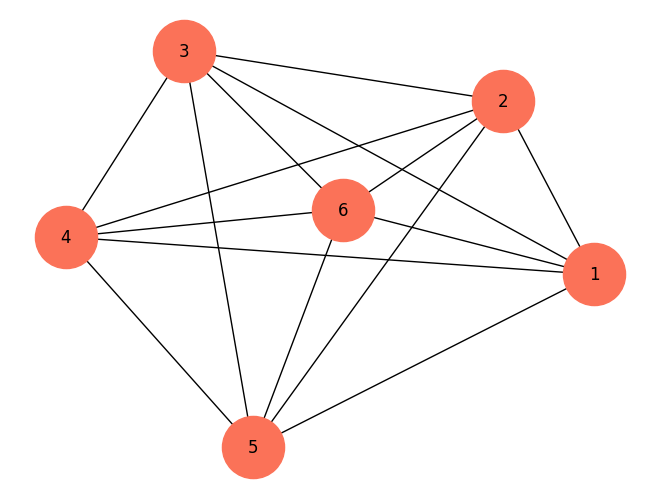

In [5]:
graph = nx.Graph() #пустой граф
graph.add_weighted_edges_from(distances) #добавление весов ребер

nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True) #отрисовка графа с вершинами

In [7]:
def edgeLength(i,j,distances,roundTrip=True): #длина ребра
  if roundTrip:
    return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                 for item in distances])
  else:
    return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances): #длина маршрута
  edges = []

  for i in range(len(V) - 1):
    edges.append(edgeLength(V[i], V[i+1], distances))
  return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True): #одна перестановка в пути
  decrement = 1 if replacementByName else 0
  arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
  return arrV

def routeReplacement(V, Z): #перестановка в пути
  for z in Z:
    V = routeOneReplacement(V, z)
  return V

def chooseRoute(distances,V,Z,T,P): #выбор пути отжигом
  sumLength = routeLength(V, distances) #длина пути
  arrSum = [sumLength] #массив суммы длины
  for i in range(len(Z)): #циклы отжигом
    newV = routeOneReplacement(V[:], Z[i]) #новый маршрут
    newS = routeLength(newV, distances) #длина нового маршрута
    arrSum.append(newS)
    deltaS = newS - sumLength #разница нового и старого

    if deltaS > 0: #вероятность если больше 0(разница)
      p = probability(deltaS, T)
      if p > P[i]: #если от 0 до p то выбираем маршрут
        V = newV
        sumLength = newS
    else: 
      V = newV
      sumLength = newS
    T = reductTemp(T) #вычисление темпы
  return V, arrSum

def drawRouteGraph(distances, bestRoute): #отрисовка графа
  newDistances = []
  for i in range(len(bestRoute)-1):
    for distance in distances:
      if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1]\
      or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
        newDistances.append(distance)
  graph = nx.Graph()
  graph.add_weighted_edges_from(newDistances)
  nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

Лучший выбранный маршрут: [1, 5, 4, 3, 2, 6, 1]
Длина лучшего выбранного маршрута: 140
Длины всех расмотренных маршрутов: [159, 179, 173, 160, 140]


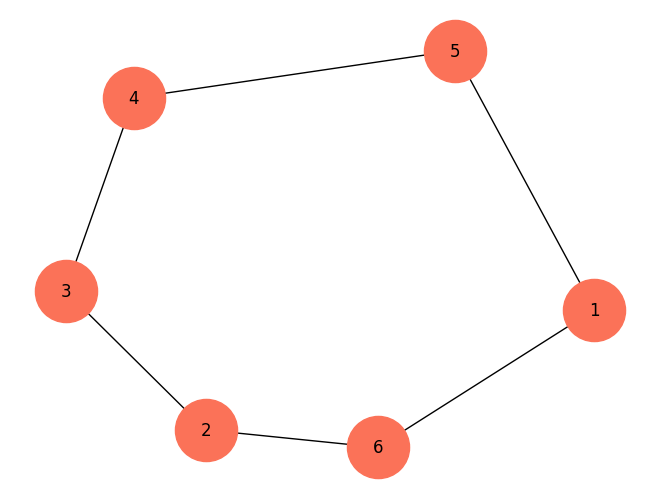

In [10]:
bestRoute, arrLength = chooseRoute(distances,V,Z,T,P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех расмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка

#Задание
Найти длину гамильтонова цикла S4 в полном графе K6 после четырех
циклов решения задачи методом отжига по вариантам ниже

Лучший выбранный маршрут: [1, 6, 4, 3, 2, 5, 1]
Длина лучшего выбранного маршрута: 24
Длины всех расмотренных маршрутов: [42, 42, 42, 24, 31]


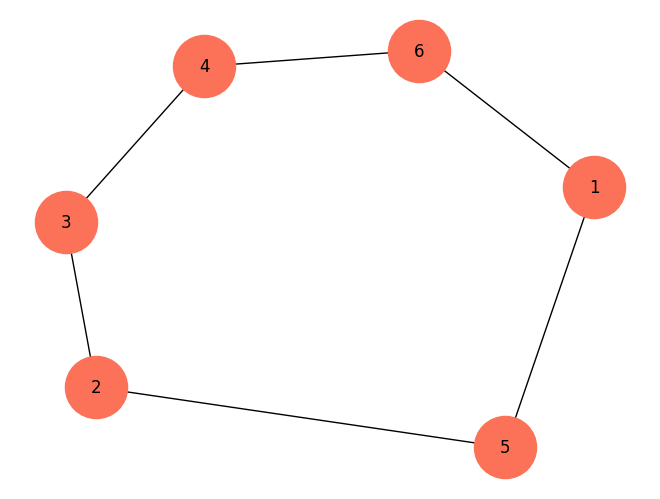

In [16]:
print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех расмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute) #отрисовка

#Задание
На решенном уже примере поэкспериментируйте с показателем S,
проанализируйте результаты.

Лучший выбранный маршрут: [1, 6, 4, 3, 2, 5, 1]
Длина лучшего выбранного маршрута: 24
Длины всех расмотренных маршрутов: [42, 42, 42, 24, 31]


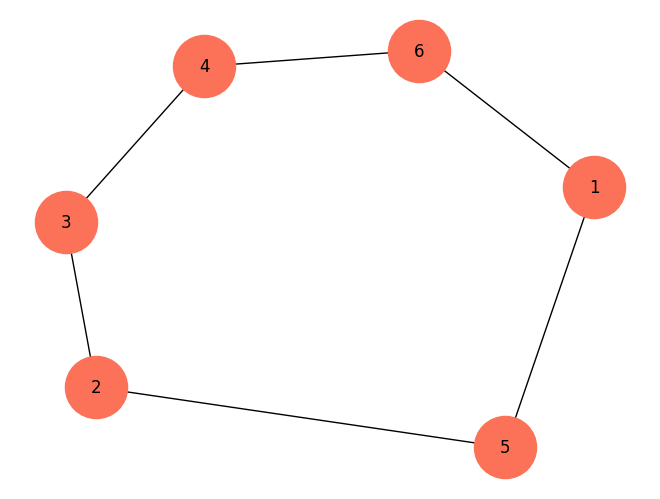

In [13]:
V = [1,3,4,5,6,2,1]
Z = [
    (4,5),
     (5,6),
     (2,4),
     (6,2)
]
P = [78,24,63,17]

T = 100


def probability(delta, T):
    return 100 * e ** (-delta/T)

def reductTemp(prevT):
    nextT = 0.1 * prevT
    return nextT

def edgeLength(i,j,distances,roundTrip=True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or (item[1] == i and item[0] == j) else -1)
                 for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])

def routeLength(V, distances):
    edges = []
    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i+1], distances))
        return sum(edges)

def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV

def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V

def chooseRoute(distances,V,Z,T,P):
    sumLength = routeLength(V, distances)
    arrSum = [sumLength]
    for i in range(len(Z)):
        newV = routeOneReplacement(V[:], Z[i])
        newS = routeLength(newV, distances)
        arrSum.append(newS)
        deltaS = newS - sumLength

        if deltaS > 0:
            p = probability(deltaS, T)
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS
            T = reductTemp(T)
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute)-1):
        
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i+1]\
            or distance[1] == bestRoute[i] and distance[0] == bestRoute[i+1]:
                newDistances.append(distance)
    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


data = [26,42,44,31,24,20,34,40,15,23,43,20,27,22,26]
m = -1
distances = []
for i in range(1,6):
    for j in range(1,6-i+1):
        m += 1
        distances.append((i, j+i, data[m]))



bestRoute, arrLength = chooseRoute(distances,V,Z,T,P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех расмотренных маршрутов: {arrLength}')

drawRouteGraph(distances, bestRoute)